# Dataset

https://www.kaggle.com/datos_estudiantessets/kundanbedmutha/exam-score-prediction-dataset?resource=download

# Imports

Cargamos las librerias más importantes al principio

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf

#Definimos la semilla
np.random.seed(42)

# Carga del dataset

Cargamos del dataset con pandas

In [2]:
datos_estudiantes = pd.read_csv("Datasets/Exam_Score_Prediction.csv", sep=',', index_col="student_id")
datos_estudiantes.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
student_id,,,,,,,,,,,,
1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


Si le echamos un vistazo podemos ver que hay columnas que no son numéricas.

En este caso estas variables no numéricas hay que codificarlas en número para poder introducirlas en la red neuronal

También hay que tener en cuenta que hay algunas variables como "facility_rating" que tienen orden por lo que hay que representarlo al realizar la codificación.

In [3]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

gender_encoder = LabelEncoder()
gender_encoder.fit(datos_estudiantes['gender'])
datos_estudiantes['gender'] = gender_encoder.transform(datos_estudiantes['gender'])
print("Gender codification")
print(list(gender_encoder.classes_))

course_encoder = LabelEncoder()
course_encoder.fit(datos_estudiantes['course'])
datos_estudiantes['course'] = course_encoder.transform(datos_estudiantes['course'])
print("\nCourse codification")
print(list(course_encoder.classes_))

internet_access_encoder = OrdinalEncoder(categories=[['no', 'yes']])
internet_access_encoder.fit(datos_estudiantes[['internet_access']])
datos_estudiantes['internet_access'] = internet_access_encoder.transform(datos_estudiantes[['internet_access']])
print("\nInternet Access codification")
print(internet_access_encoder.categories_)

sleep_quality_encoder = OrdinalEncoder(categories=[['poor', 'average', 'good']])
sleep_quality_encoder.fit(datos_estudiantes[['sleep_quality']])
datos_estudiantes['sleep_quality'] = sleep_quality_encoder.transform(datos_estudiantes[['sleep_quality']])
print("\nSleep Quality codification")
print(sleep_quality_encoder.categories_)

study_method_encoder = LabelEncoder()
study_method_encoder.fit(datos_estudiantes['study_method'])
datos_estudiantes['study_method'] = study_method_encoder.transform(datos_estudiantes['study_method'])
print("\nStudy Method codification")
print(list(study_method_encoder.classes_))

facility_rating_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
facility_rating_encoder.fit(datos_estudiantes[['facility_rating']])
datos_estudiantes['facility_rating'] = facility_rating_encoder.transform(datos_estudiantes[['facility_rating']])
print("\nFacility Rating codification")
print(facility_rating_encoder.categories_)

exam_difficulty_encoder = OrdinalEncoder(categories=[['easy', 'moderate', 'hard']])
exam_difficulty_encoder.fit(datos_estudiantes[['exam_difficulty']])
datos_estudiantes['exam_difficulty'] = exam_difficulty_encoder.transform(datos_estudiantes[['exam_difficulty']])
print("\nExam Difficulty codification")
print(exam_difficulty_encoder.categories_)

Gender codification
['female', 'male', 'other']

Course codification
['b.com', 'b.sc', 'b.tech', 'ba', 'bba', 'bca', 'diploma']

Internet Access codification
[array(['no', 'yes'], dtype=object)]

Sleep Quality codification
[array(['poor', 'average', 'good'], dtype=object)]

Study Method codification
['coaching', 'group study', 'mixed', 'online videos', 'self-study']

Facility Rating codification
[array(['low', 'medium', 'high'], dtype=object)]

Exam Difficulty codification
[array(['easy', 'moderate', 'hard'], dtype=object)]


In [4]:
datos_estudiantes.head()

,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
student_id,,,,,,,,,,,,
1,17,1,6,2.78,92.9,1.0,7.4,0.0,0,0.0,2.0,58.9
2,23,2,5,3.37,64.8,1.0,4.6,1.0,3,1.0,1.0,54.8
3,22,1,1,7.88,76.8,1.0,8.5,0.0,0,2.0,1.0,90.3
4,20,2,6,0.67,48.4,1.0,5.8,1.0,3,0.0,1.0,29.7
5,20,0,6,0.89,71.6,1.0,9.8,0.0,0,0.0,1.0,43.7


# Visualizacion de algunas variables

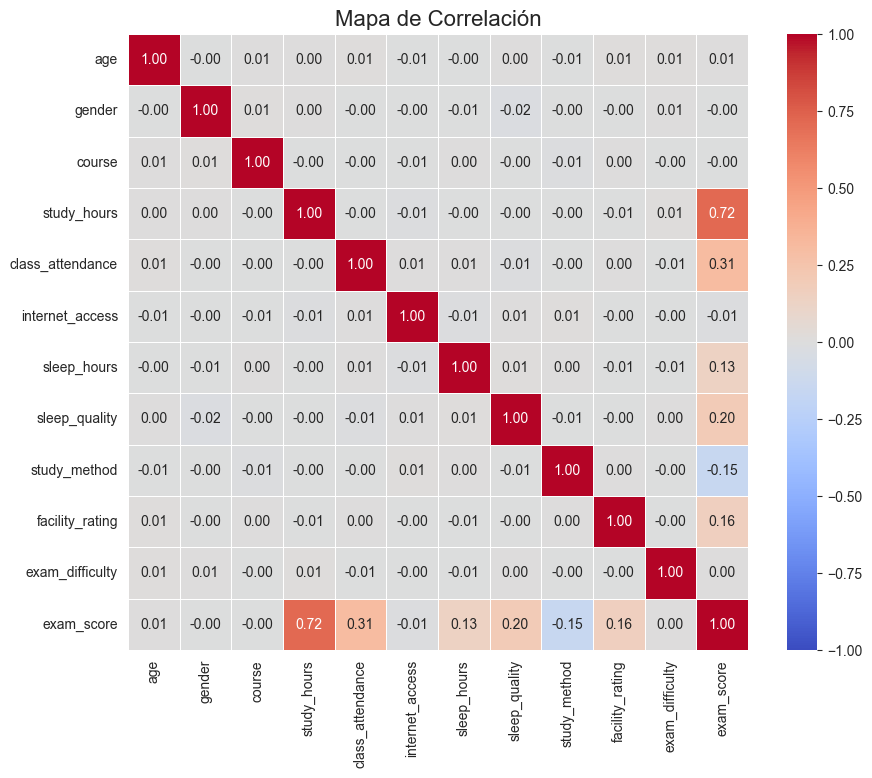

In [5]:
matriz_correlacion = datos_estudiantes.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Mapa de Correlación', fontsize=16)
plt.show()

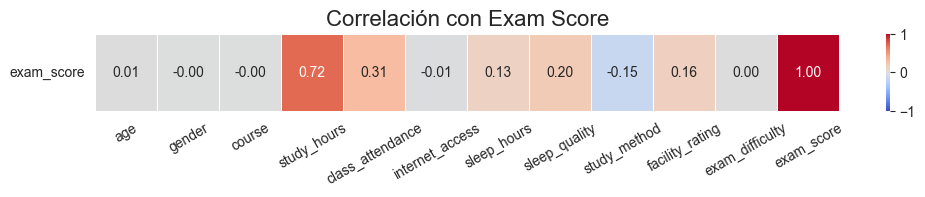

In [6]:
target_corr = matriz_correlacion.loc[['exam_score'], :]

plt.figure(figsize=(12, 1))

sns.heatmap(target_corr, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            linewidths=0.5, 
            vmin=-1, 
            vmax=1)

plt.title('Correlación con Exam Score', fontsize=16)
plt.yticks(rotation=0)
plt.xticks(rotation=30)
plt.show()

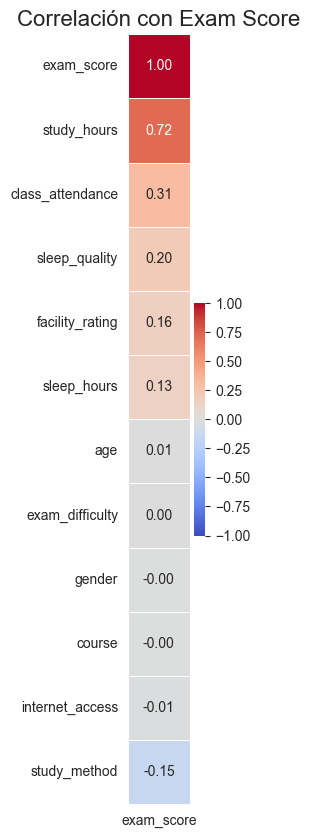

In [7]:
# 1. Filtramos para tener solo la columna 'exam_score' y ordenamos los valores
# Usamos doble corchete [['exam_score']] para mantenerlo como DataFrame
target_corr = matriz_correlacion[['exam_score']].sort_values(by='exam_score', ascending=False)

# 2. Ajustamos el tamaño (más alto que ancho)
plt.figure(figsize=(1, 10))

# 3. Creamos el heatmap con los datos filtrados
sns.heatmap(target_corr, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            linewidths=0.5, 
            vmin=-1, 
            vmax=1)

plt.title('Correlación con Exam Score', fontsize=16)
plt.show()

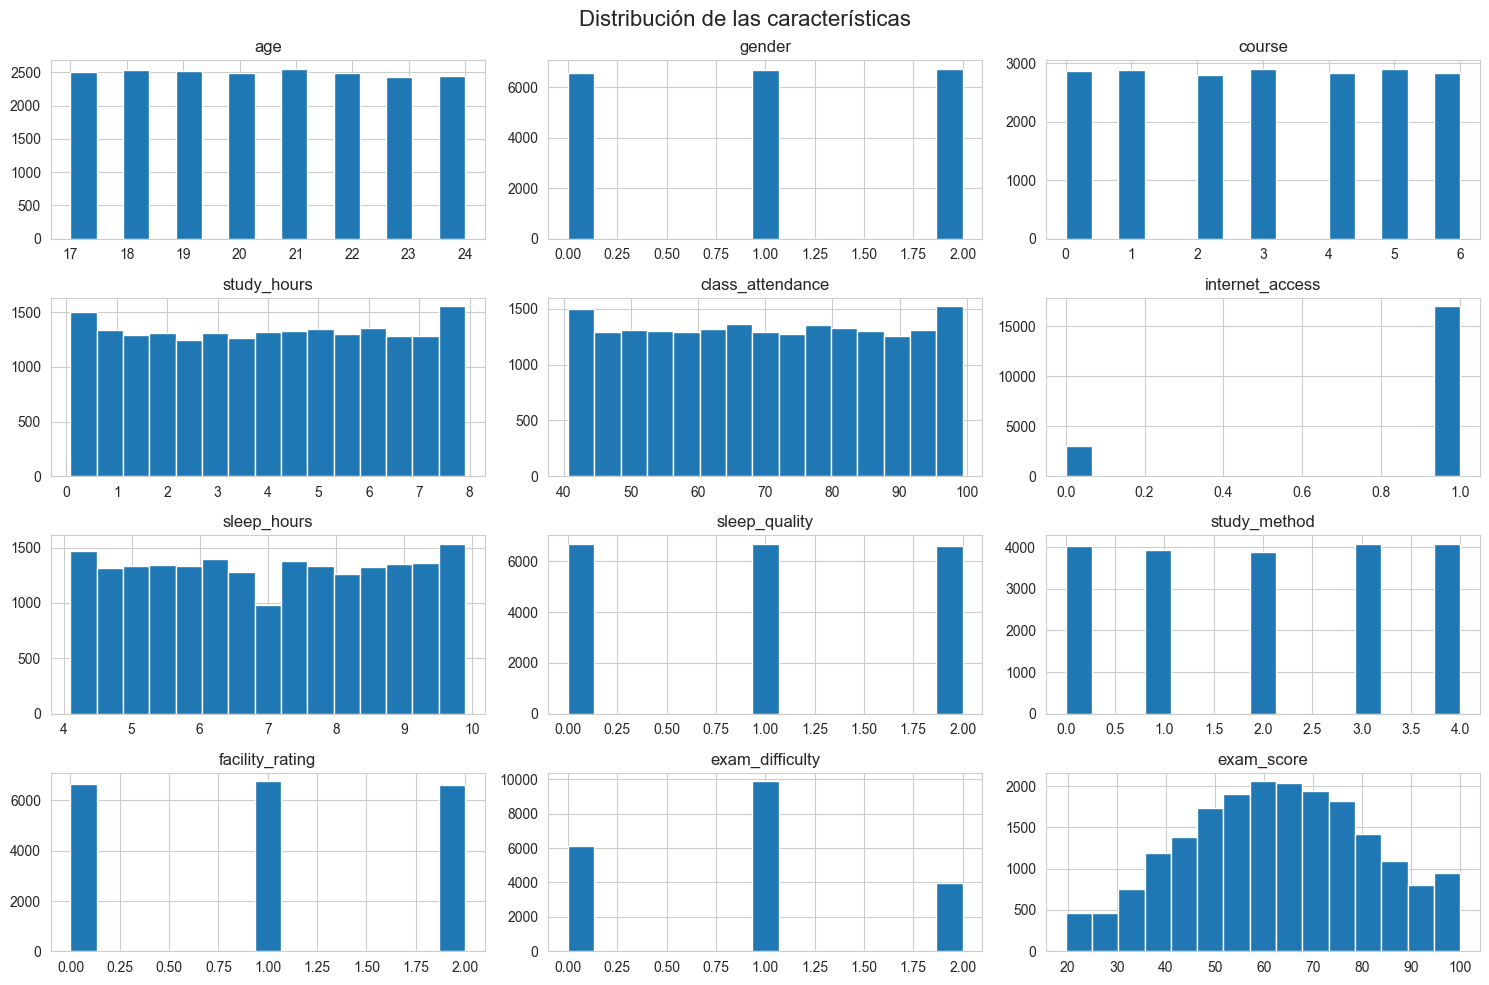

In [8]:
datos_estudiantes.hist(bins=15, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Distribución de las características', fontsize=16)
plt.tight_layout()
plt.show()

# Regresion con redes neuronales

Realizamos la division del dataset en entrenamiento, validacion y prueba

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().set_output(transform="pandas")
y_scaler = MinMaxScaler().set_output(transform="pandas")

X = datos_estudiantes.drop(['exam_score'], axis=1)
y = datos_estudiantes['exam_score']

X_scaled, y_scaled = X_scaler.fit_transform(X), y_scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y_scaled, test_size=0.20, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.70, random_state=42
)

Creamos varias funciones para compilar, entrenar, evaluar y mostrar resultados, con el fin de tener un codigo mas limpio

In [10]:
def compila_modelo(modelo, optimizer, lr=1e-3):
    opt = optimizer(learning_rate=lr)
    modelo.compile(
        optimizer=opt,
        loss=tf.keras.losses.MeanSquaredError(),
        metrics=[
            tf.keras.metrics.RootMeanSquaredError(),
            tf.keras.metrics.MeanAbsoluteError(),
            tf.keras.metrics.R2Score(),
        ]
    )
    return modelo

def entrena_y_evalua(modelo, X_train, y_train, X_val, y_val, X_test, y_test,
                     epochs=80, batch_size=256, callbacks=None, verbose=0):
    history = modelo.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks or [],
        verbose=verbose
    )

    # Evaluación final en test
    test = modelo.evaluate(X_test, y_test, verbose=0)

    metrics = dict()

    for nombre, valor in zip(["MSE", "RMSE", "MAE", "R2"], test):
        metrics[nombre] = valor

    return history, metrics

def plot_history(history, titulo="Entrenamiento"):
    h = history.history
    epochs = np.arange(1, len(h["loss"]) + 1)

    # Loss
    plt.figure(figsize=(12, 5))
    plt.grid(True)
    plt.plot(epochs, h["loss"], "--", linewidth=2, label="loss train")
    plt.plot(epochs, h["val_loss"], "-", linewidth=2, label="loss val")
    plt.title(titulo + " | Loss")
    plt.xlabel("Época")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure(figsize=(12, 5))
    plt.grid(True)
    plt.plot(epochs, h["root_mean_squared_error"], "--", linewidth=2, label="RMSE train")
    plt.plot(epochs, h["val_root_mean_squared_error"], "-", linewidth=2, label="RMSE val")
    plt.title(titulo + " | RMSE")
    plt.xlabel("Época")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

def plot_pred(y_real, y_pred):
    errores = np.abs(y_real - y_pred)

    fig, ax1 = plt.subplots(1, 1, figsize=(14, 6))
    sc = ax1.scatter(y_real, y_pred, c=errores, cmap='Reds', s=100, edgecolors='k')
    ax1.plot([0, 100], [0, 100], 'k--', alpha=0.5, label='Predicción Perfecta')

    ax1.set_title('Precisión General del Modelo', fontsize=14)
    ax1.set_xlabel('Nota Real', fontsize=12)
    ax1.set_ylabel('Nota Predicha', fontsize=12)
    ax1.set_xlim(0, 105)
    ax1.set_ylim(0, 105)
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    cbar = plt.colorbar(sc, ax=ax1)
    cbar.set_label('Magnitud del Error')

    plt.show()

### Modelo A

Construimos el modelo A.

Este modelo es el primer modelo que creamos. Como sabemos que los datos son numéricos y a priori no parecen tener una gran complejidad optamos por un diseño con pocas capas y pocas neuronas.

Esto a priori debería ayudar a reducir el overfitting, ya que estamos intentando igualar la complejidad del modelo con la de los datos, y mejorar los resultados en general.

In [11]:
def build_model_A(input_dim):
    entrada = tf.keras.layers.Input(shape=(input_dim,))
    x = tf.keras.layers.Dense(30, activation="relu")(entrada)
    x = tf.keras.layers.Dense(30, activation="relu")(x)
    salida = tf.keras.layers.Dense(1, activation="relu")(x)
    return tf.keras.Model(inputs=entrada, outputs=salida)

Tambien usamos capas de activación y optimizadores con buena reputacion como ReLU y ADAM, y un learning rate estandar.

In [30]:
modeloA = build_model_A(X_train.shape[1])
modeloA = compila_modelo(modeloA, tf.keras.optimizers.Adam, lr=1e-3)

histA, metricsA = entrena_y_evalua(
    modeloA, X_train, y_train, X_val, y_val, X_test, y_test,
    epochs=80, batch_size=512, verbose=1
)

Epoch 1/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1407 - mean_absolute_error: 0.3014 - r2_score: -1.5450 - root_mean_squared_error: 0.3751 - val_loss: 0.0628 - val_mean_absolute_error: 0.2032 - val_r2_score: -0.1487 - val_root_mean_squared_error: 0.2506
Epoch 2/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0502 - mean_absolute_error: 0.1817 - r2_score: 0.0927 - root_mean_squared_error: 0.2240 - val_loss: 0.0378 - val_mean_absolute_error: 0.1568 - val_r2_score: 0.3092 - val_root_mean_squared_error: 0.1943
Epoch 3/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0301 - mean_absolute_error: 0.1398 - r2_score: 0.4555 - root_mean_squared_error: 0.1735 - val_loss: 0.0233 - val_mean_absolute_error: 0.1224 - val_r2_score: 0.5733 - val_root_mean_squared_error: 0.1527
Epoch 4/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0206 - mean_absolute_error: 0.1152 - r2_score: 0.6272 - root_mean_squared_error: 0.1436 - val_loss: 0.0183 - val_mean_absolute_error: 0.1082 - val_r2_s

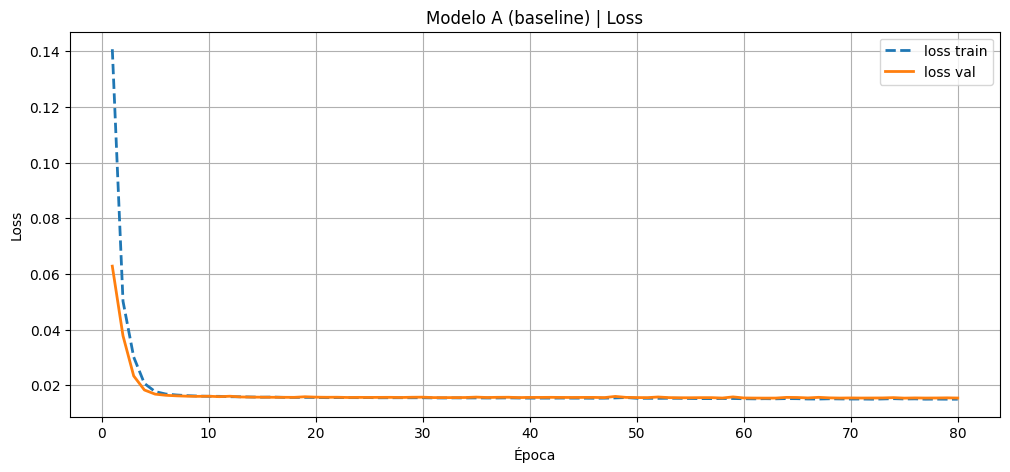

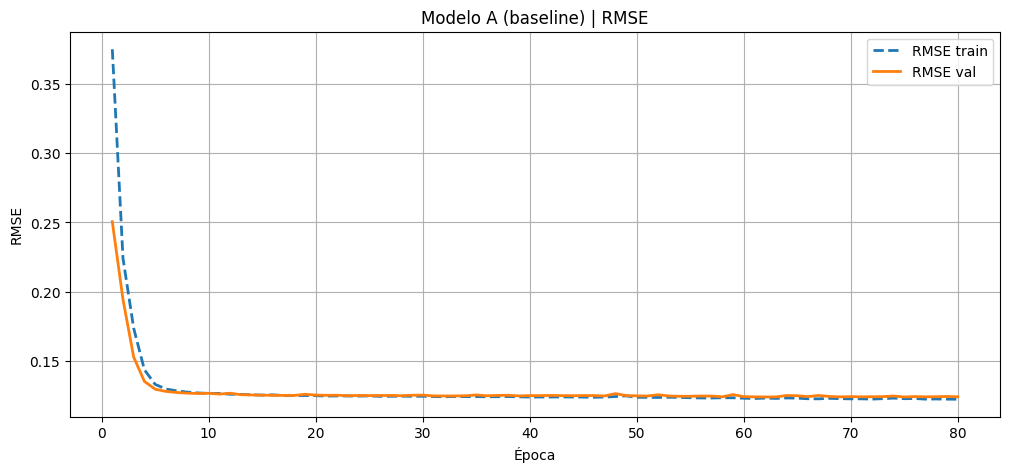

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


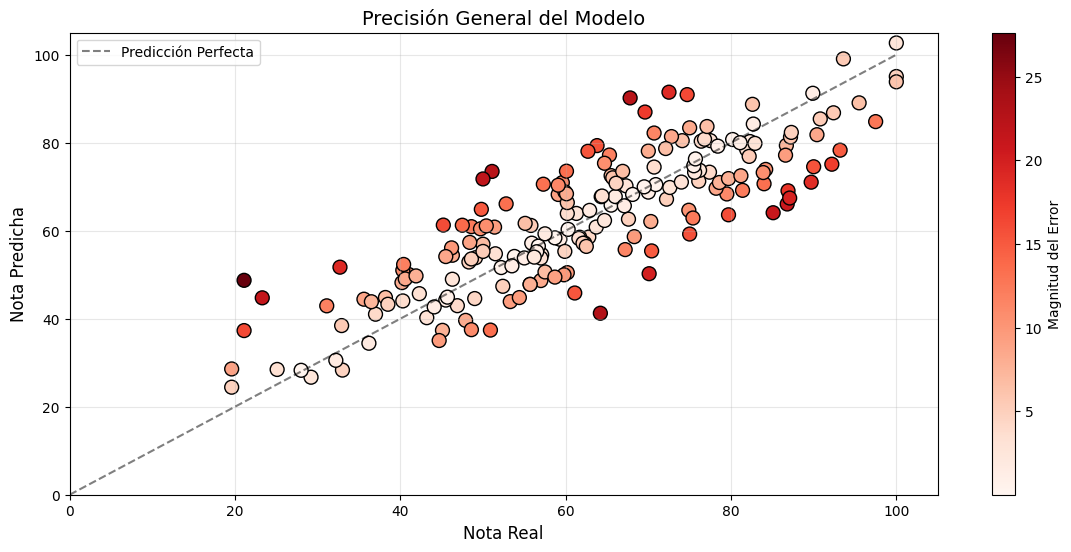

In [31]:
plot_history(histA, "Modelo A (baseline)")
y_pred = modeloA.predict(X_test[:200])
y_pred_inv = y_scaler.inverse_transform(y_pred)
y_test_inv = y_scaler.inverse_transform(y_test[:200])
plot_pred(y_test_inv, y_pred_inv)

Tras esta primera prueba podemos ver varias cosas:

- Las siguientes méticas, que por si solas no significan nada, hay que hacer otra prueba para comparar:
  - 'MSE': 0.015351277776062489
  - 'RMSE': 0.12390027195215225
  - 'MAE': 0.10026712715625763
  - 'R2': 0.7240228652954102
- Más de la mitad de epochs no han servido de nada
  - Hay que parar cuando no se vea ganancia (EarlyStopping)
- Hay que probar con otros hiperparámetros para ver si hay mejora

### Modelo B

Para este modelo añadimos 1 capa, y modificamos el numero de neuronas por capa. También reducimos el learning rate.

Tras una prueba hemos visto que con el nuevo learning rate el early stopping no ha saltado, por lo que añadimos más epochs para capturar la máxima cantidad de información posible.

In [12]:
def build_model_B(input_dim):
    entrada = tf.keras.layers.Input(shape=(input_dim,))
    x = tf.keras.layers.Dense(15, activation="relu")(entrada)
    x = tf.keras.layers.Dense(30, activation="relu")(x)
    x = tf.keras.layers.Dense(15, activation="relu")(x)
    salida = tf.keras.layers.Dense(1, activation="relu")(x)
    return tf.keras.Model(inputs=entrada, outputs=salida)

In [33]:
modeloB = build_model_B(X_train.shape[1])
modeloB = compila_modelo(modeloB, tf.keras.optimizers.Adam, lr=1e-4)

histB, metricsB = entrena_y_evalua(
    modeloB, X_train, y_train, X_val, y_val, X_test, y_test,
    epochs=200, batch_size=256, verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)

Epoch 1/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3289 - mean_absolute_error: 0.5212 - r2_score: -4.9471 - root_mean_squared_error: 0.5735 - val_loss: 0.2848 - val_mean_absolute_error: 0.4745 - val_r2_score: -4.2113 - val_root_mean_squared_error: 0.5337
Epoch 2/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1711 - mean_absolute_error: 0.3417 - r2_score: -2.0937 - root_mean_squared_error: 0.4136 - val_loss: 0.0888 - val_mean_absolute_error: 0.2428 - val_r2_score: -0.6251 - val_root_mean_squared_error: 0.2980
Epoch 3/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0736 - mean_absolute_error: 0.2187 - r2_score: -0.3318 - root_mean_squared_error: 0.2714 - val_loss: 0.0672 - val_mean_absolute_error: 0.2117 - val_r2_score: -0.2287 - val_root_mean_squared_error: 0.2591
Epoch 4/200
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0637 - mean_absolute_error: 0.2044 - r2_score: -0.1520 - root_mean_squared_error: 0.2524 - val_loss: 0.0618 - val_mean_absolute_error: 0.2031 -

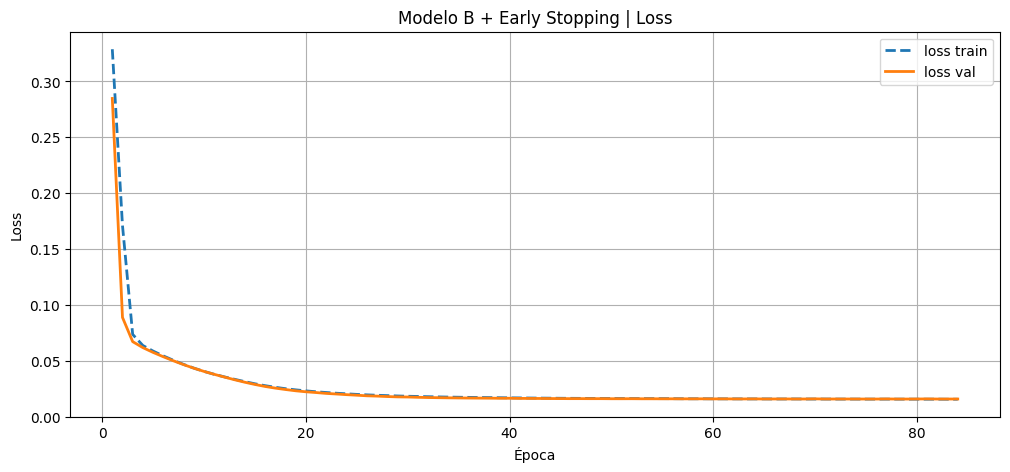

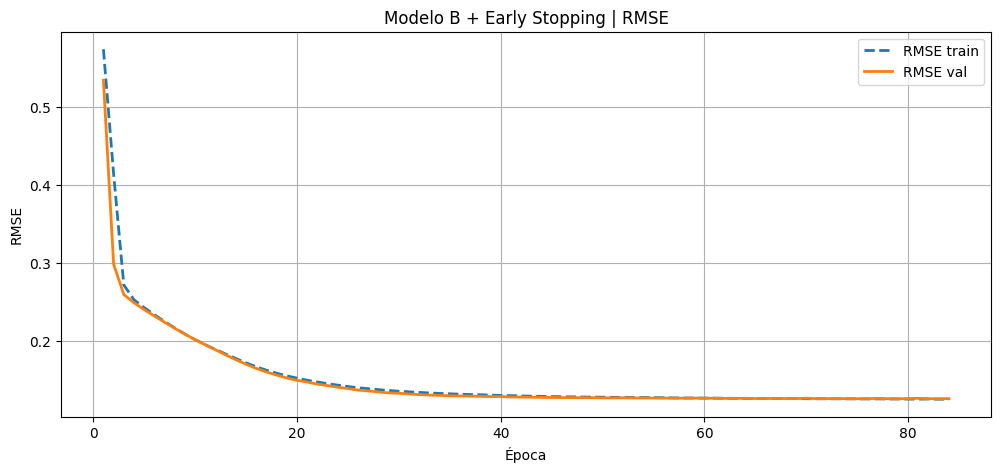

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


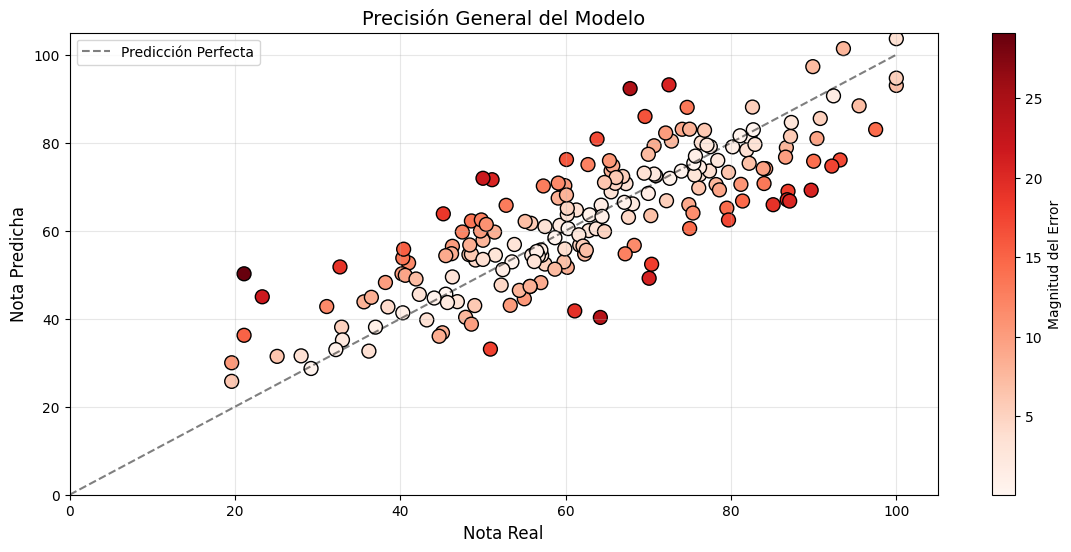

{'MSE': 0.01581711694598198, 'RMSE': 0.1257661134004593, 'MAE': 0.10103291273117065, 'R2': 0.7156482338905334}


In [35]:
plot_history(histB, "Modelo B + Early Stopping")
y_pred = modeloB.predict(X_test[:200])
y_pred_inv = y_scaler.inverse_transform(y_pred)
y_test_inv = y_scaler.inverse_transform(y_test[:200])
plot_pred(y_test_inv, y_pred_inv)

print(metricsB)

Tras esta segunda prueba podemos ver las siguientes cosas:

- Nuevas métricas:
  - 'MSE': 0.015440128743648529
  - 'RMSE': 0.12425831705331802
  - 'MAE': 0.10006236284971237
  - 'R2': 0.7224255204200745
- Podemos ver que la curva de apredizaje es más suave.
- Comparando los errores con el modelo anterior, este es muy ligeramente peor (-0.0001 de diferencia en RMSE)

### Grid Search

Tras las pruebas anteriores, a pesar de haber construido 2 modelos diferentes hemos obtenido casi el mismo resultado.

Aun así vamos a realizar una busqueda exahustiva de modelos para intentara valorarlo todo por si nos dejamos algo en el tintero.

In [11]:
def build_model(input_dim, layer1, layer2, layer3, dropout):
    entrada = tf.keras.layers.Input(shape=(input_dim,))
    x = tf.keras.layers.Dense(layer1, activation="relu")(entrada)
    x = tf.keras.layers.Dense(layer2, activation="relu")(x)
    x = tf.keras.layers.Dense(layer3, activation="relu")(x)

    dropout = tf.keras.layers.Dropout(dropout)(x)
    salida = tf.keras.layers.Dense(1, activation="relu")(dropout)
    return tf.keras.Model(inputs=entrada, outputs=salida)

In [12]:
import os
import itertools
from tqdm.notebook import tqdm


MODEL_FILENAME = "models/best_model.keras"
CSV_FILENAME = "res.csv"

grid_neuronas = list(itertools.combinations_with_replacement([16, 32, 64], 3))
grid_lr = [1e-2, 1e-3, 1e-4]
grid_dropout = [0.2, 0.3]
grid_opts = [tf.keras.optimizers.Adam, tf.keras.optimizers.SGD]

grid_comb = list(itertools.product(grid_neuronas, grid_lr, grid_dropout, grid_opts))


if os.path.exists(CSV_FILENAME):
    df_resultados = pd.read_csv(CSV_FILENAME, index_col=0)
    print("Resultados anteriores cargados desde CSV.")
    print(f"Mejor RMSE: {df_resultados['rmse'].min():.4f}")
        
else:
    print(f"Iniciando Grid Search ({len(grid_comb)} combinaciones")
    
    resultados = []
    best_rmse = float('inf')
    best_model = None
    best_params = {}

    pbar = tqdm(grid_comb, desc="Entrenando modelos")

    for (layer1, layer2, layer3), lr, dropout, opt in pbar:
        
        modelo_temp = build_model(X_train.shape[1], layer1, layer2, layer3, dropout)
        
        modelo_temp = compila_modelo(modelo_temp, opt, lr=lr)

        hist, metrics = entrena_y_evalua(
            modelo_temp, X_train, y_train, X_val, y_val, X_test, y_test,
            epochs=200,
            batch_size=512,
            verbose=0, 
            callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
        )
        
        current_rmse = metrics['RMSE']
        current_r2 = metrics['R2']

        res = {
            'neuronas': (layer1, layer2, layer3),
            'dropout': dropout,
            'lr': lr,
            'opt': opt.__name__,
            'rmse': metrics['RMSE'],
            'r2': metrics['R2']
        }
        
        resultados.append(res)

        if current_rmse < best_rmse:
            best_rmse = current_rmse
            best_model = modelo_temp
            best_params = res
            
        pbar.set_postfix({'Best RMSE': f'{best_rmse:.4f}', 'Last RMSE': f'{current_rmse:.2f}'})


    print(f"\n GRID SEARCH FINALIZADO")
    print(f"Mejor RMSE: {best_rmse:.4f}")
    print(f"Mejores parámetros: {best_params}")

    df_resultados = pd.DataFrame(resultados).sort_values(by='rmse')
    print("\nMejores configuraciones:")
    print(df_resultados.head())

    df_resultados.to_csv(CSV_FILENAME)
    best_model.save("best_model.keras")
    print("Datos guardados")

Resultados anteriores cargados desde CSV.
Mejor RMSE: 0.1232


## Mejor Modelo Grid Search

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


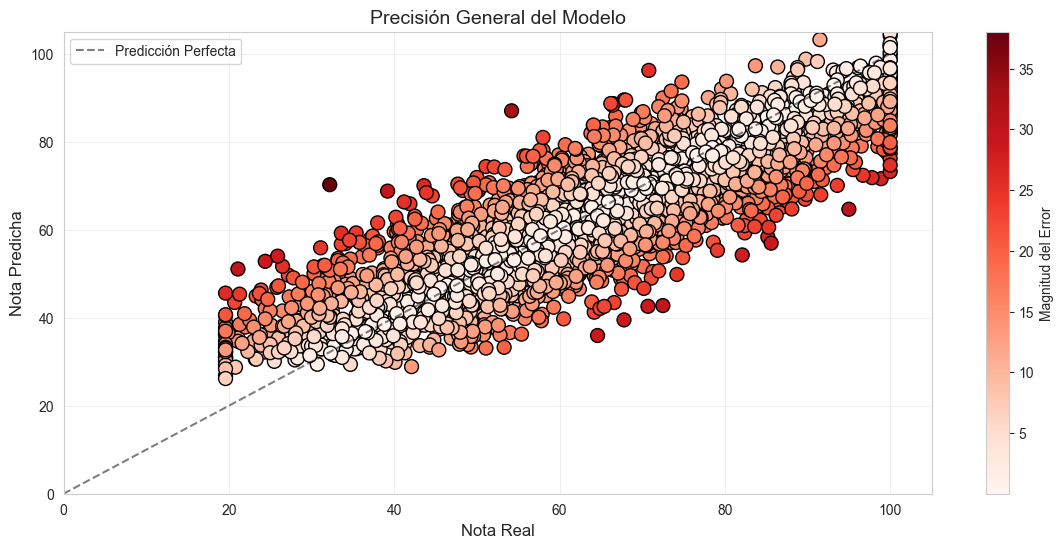

In [14]:
if not os.path.exists(CSV_FILENAME):
    best_model = build_model(X_train.shape[1], 32, 32, 64, 0.2)
    best_model = compila_modelo(best_model, tf.keras.optimizers.Adam, lr=1e-2)
    hist, metrics = entrena_y_evalua(
        best_model, X_train, y_train, X_val, y_val, X_test, y_test,
        epochs=200,
        batch_size=512,
        verbose=1,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
    )
    plot_history(hist, "Mejor Modelo tras Grid Search")
else:
    best_model = tf.keras.models.load_model("models/best_model.keras")

y_pred = best_model.predict(X_test)
y_pred_inv = y_scaler.inverse_transform(y_pred)
y_test_inv = y_scaler.inverse_transform(y_test)
plot_pred(y_test_inv, y_pred_inv)

## Visualizacion de resultados de todos los modelos de grid search

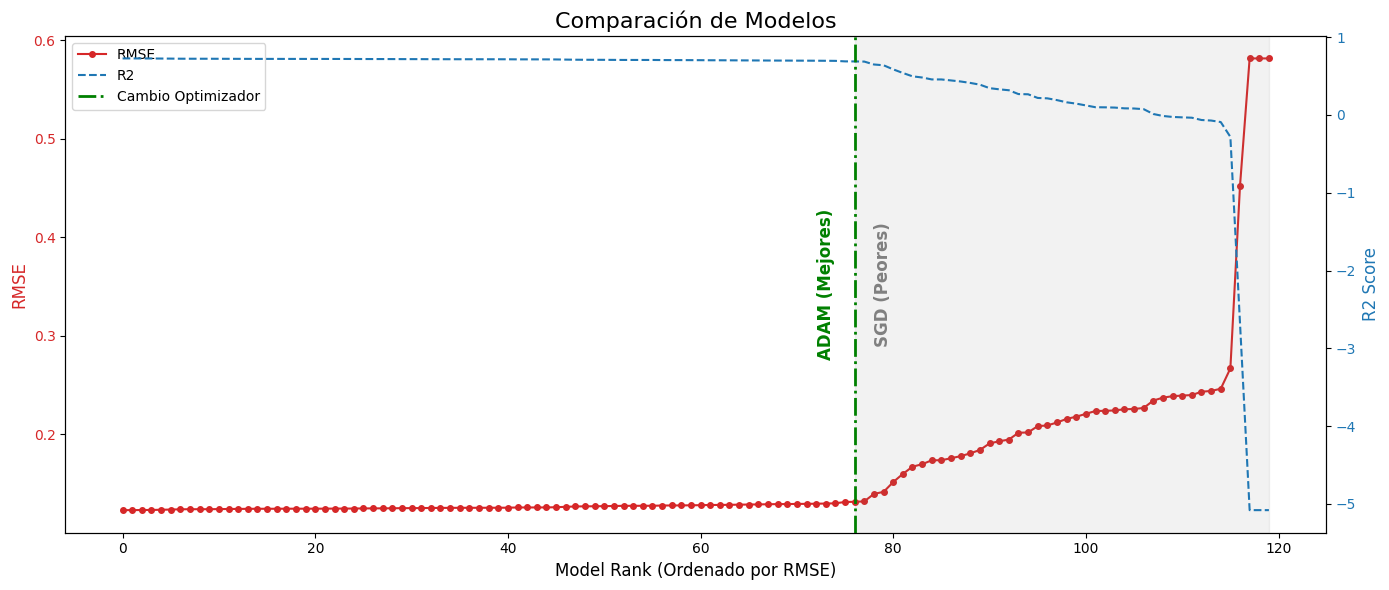

In [ ]:
df = pd.read_csv("res.csv", index_col=0)

df_sorted = df.sort_values(by='rmse', ascending=True).reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(14, 6))
x = df_sorted.index

line1 = ax1.plot(x, df_sorted['rmse'], color='tab:red', marker='o', markersize=4, label='RMSE', linewidth=1.5)
ax1.set_xlabel('Model Rank (Ordenado por RMSE)', fontsize=12)
ax1.set_ylabel('RMSE', color='tab:red', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
line2 = ax2.plot(x, df_sorted['r2'], color='tab:blue', linestyle='--', label='R2', linewidth=1.5)
ax2.set_ylabel('R2 Score', color='tab:blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:blue')

umbral_x = 76

line_v = plt.axvline(x=umbral_x, color='green', linestyle='-.', linewidth=2, label='Cambio Optimizador')

y_min, y_max = ax1.get_ylim()
y_pos = y_min + (y_max - y_min) * 0.5

ax1.text(umbral_x - 2, y_pos, 'ADAM (Mejores)', color='green', 
         ha='right', va='center', fontweight='bold', fontsize=12, rotation=90)

ax1.text(umbral_x + 2, y_pos, 'SGD (Peores)', color='gray', 
         ha='left', va='center', fontweight='bold', fontsize=12, rotation=90)

plt.axvspan(umbral_x, x[-1], color='gray', alpha=0.1) 

plt.title('Comparación de Modelos', fontsize=16)

lines = line1 + line2 + [line_v]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

## Estimacion de error del mejor modelo obtenido

Error Absoluto Promedio (MAE): 8.01 puntos


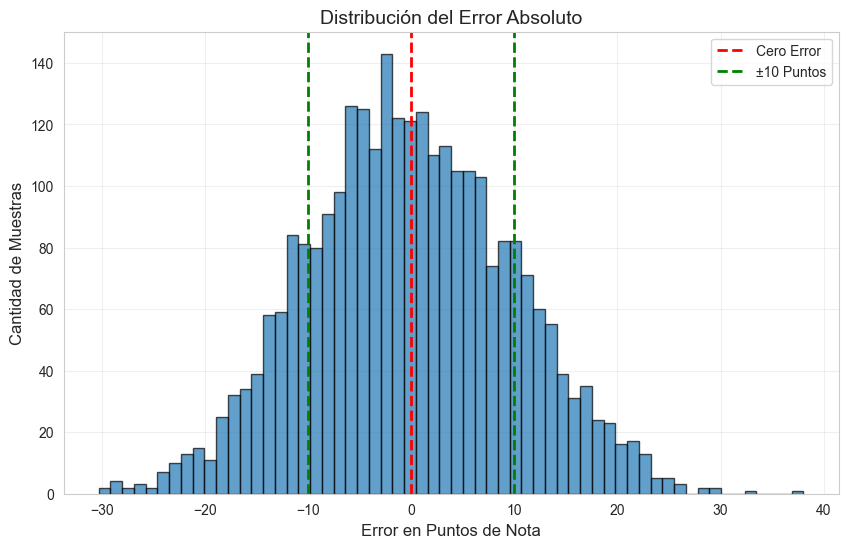

In [17]:
import numpy as np
import matplotlib.pyplot as plt

y_real = y_test_inv.flatten()
y_estimado = y_pred_inv.flatten()

error_puntos = y_estimado - y_real

mae = np.mean(np.abs(error_puntos))
print(f"Error Absoluto Promedio (MAE): {mae:.2f} puntos")

plt.figure(figsize=(10, 6))

plt.hist(error_puntos, bins=60, edgecolor='black', alpha=0.7)

plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Cero Error')

plt.axvline(10, color='green', linestyle='--', linewidth=2, label='±10 Puntos')
plt.axvline(-10, color='green', linestyle='--', linewidth=2)

plt.title('Distribución del Error Absoluto', fontsize=14)
plt.xlabel('Error en Puntos de Nota', fontsize=12)
plt.ylabel('Cantidad de Muestras', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.show()

<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
C:\Users\AVS\AppData\Local\Temp\ipykernel_15780\4083911537.py:28: SyntaxWarning: invalid escape sequence '\s'
  plt.axvline(-1, color='orange', linestyle='--', alpha=0.5, label='±1 $\sigma$')
C:\Users\AVS\AppData\Local\Temp\ipykernel_15780\4083911537.py:30: SyntaxWarning: invalid escape sequence '\s'
  plt.axvline(-2, color='red', linestyle='--', alpha=0.5, label='±2 $\sigma$')
C:\Users\AVS\AppData\Local\Temp\ipykernel_15780\4083911537.py:32: SyntaxWarning: invalid escape sequence '\s'

Desviación Estándar de los errores (1 Sigma): 9.9440
Promedio de los errores (Bias): 0.2963


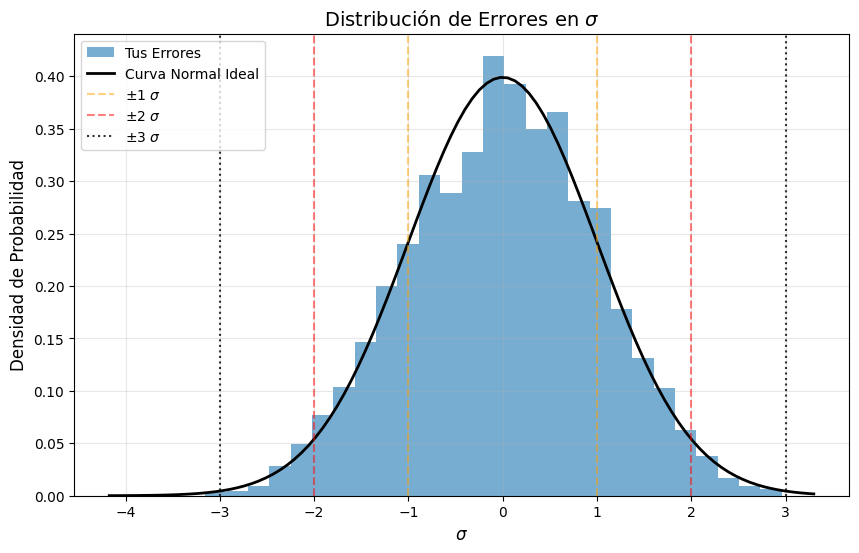

Número de predicciones extremas (> 3 sigmas): 3 de 2800


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

y_real = y_test_inv.flatten()
y_estimado = y_pred_inv.flatten()

errores = y_real - y_estimado

sigma_error = np.std(errores)
media_error = np.mean(errores)

print(f"Desviación Estándar de los errores (1 Sigma): {sigma_error:.4f}")
print(f"Promedio de los errores (Bias): {media_error:.4f}")

errores_en_sigmas = (errores - media_error) / sigma_error

plt.figure(figsize=(10, 6))

plt.hist(errores_en_sigmas, bins=30, density=True, alpha=0.6, label='Tus Errores')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2, label='Curva Normal Ideal')

plt.axvline(1, color='orange', linestyle='--', alpha=0.5)
plt.axvline(-1, color='orange', linestyle='--', alpha=0.5, label='±1 $\sigma$')
plt.axvline(2, color='red', linestyle='--', alpha=0.5)
plt.axvline(-2, color='red', linestyle='--', alpha=0.5, label='±2 $\sigma$')
plt.axvline(3, color='black', linestyle=':', alpha=0.8)
plt.axvline(-3, color='black', linestyle=':', alpha=0.8, label='±3 $\sigma$')

plt.title('Distribución de Errores en $\sigma$', fontsize=14)
plt.xlabel('$\sigma$', fontsize=12)
plt.ylabel('Densidad de Probabilidad', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()